In [1]:
import pandas as pd
import numpy as np
import re
import sys
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer


In [2]:
df = pd.read_csv("D:/2022산림문화/2022산림문화 본문_to_morphs.txt", encoding='UTF-8')
print(df.shape, df.columns)
corpus = df['본문당 형태소'].to_list()
print(len(corpus))
# df


(20216, 1) Index(['본문당 형태소'], dtype='object')
20216


In [3]:
stopwords_df = pd.read_csv("C:/Users/user/Documents/jupyter_notebook/한국어 조사 목록.txt", encoding='UTF-8')
stopwords = stopwords_df['조사'].to_list()
print(len(stopwords), stopwords[:10])


425 ['가', '같이', '같이나', '같이는', '같이는야', '같이는커녕', '같이도', '같이만', '같인', '고']


# networkx로 중심성 구하기

In [4]:
import networkx as nx
import matplotlib.cm as cm
from matplotlib.colors import Normalize


In [8]:
c_comatx = pd.read_csv("D:/2022산림문화/2022산림문화_문화감성어 단어동시출현행렬.txt", encoding='UTF-8')
c_comatx


,지역,산림,문화,숲,체험,길,사람,교육,공원,자연,...,식물,휴양,박물관,숲길,하늘,카페,이야기,힐링,미래,풍경
지역,0,8933,9121,4036,3512,3531,4119,4277,3608,4909,...,1771,1767,1510,1161,1832,2202,2402,2189,2737,1762
산림,8933,0,15709,7757,6555,6744,6904,5984,5335,7912,...,2945,3884,2341,2467,3175,3568,3760,3939,3315,3168
문화,9121,15709,0,7330,6487,6597,6901,6063,5241,7777,...,2865,3757,2341,2307,3116,3544,3784,3773,3453,3042
숲,4036,7757,7330,0,4457,4329,3648,2702,3238,4815,...,1875,2373,1202,2142,2266,2146,2294,2987,1520,2246
체험,3512,6555,6487,4457,0,3674,2915,2904,2715,3823,...,1555,2143,1357,1538,1545,1822,1658,2483,1203,1589
길,3531,6744,6597,4329,3674,0,4177,2256,2905,3951,...,1677,2002,1428,1877,2338,1963,2214,2205,1155,2286
사람,4119,6904,6901,3648,2915,4177,0,2601,2452,4098,...,1765,1498,1245,1245,2024,1774,2537,1658,1445,1859
교육,4277,5984,6063,2702,2904,2256,2601,0,2061,3003,...,1284,1194,1085,737,932,1363,1441,1352,2021,807
공원,3608,5335,5241,3238,2715,2905,2452,2061,0,3341,...,1185,1365,1213,1002,1488,1728,1550,1873,1440,1607
자연,4909,7912,7777,4815,3823,3951,4098,3003,3341,0,...,2171,2089,1417,1531,2194,2015,2425,2728,1850,2278


In [9]:
c_comatx_array = c_comatx.to_numpy()
print(type(c_comatx_array), c_comatx_array.shape)
c_comatx_array


<class 'numpy.ndarray'> (50, 50)


array([[    0,  8933,  9121, ...,  2189,  2737,  1762],
       [ 8933,     0, 15709, ...,  3939,  3315,  3168],
       [ 9121, 15709,     0, ...,  3773,  3453,  3042],
       ...,
       [ 2189,  3939,  3773, ...,     0,   923,  1404],
       [ 2737,  3315,  3453, ...,   923,     0,   646],
       [ 1762,  3168,  3042, ...,  1404,   646,     0]], dtype=int64)

In [10]:
G = nx.from_numpy_array(c_comatx_array)


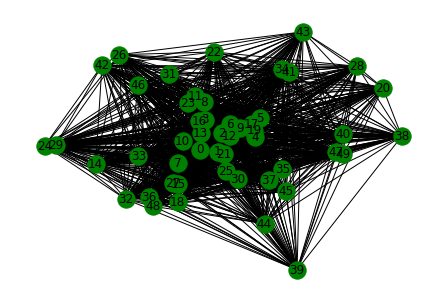

In [22]:
nx.draw(G, with_labels = True, node_color = 'green')


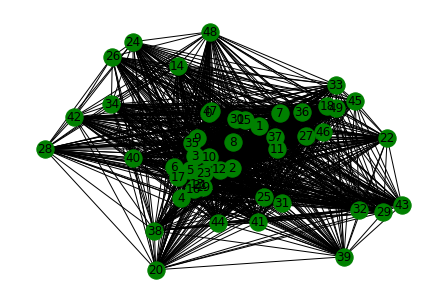

In [21]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_color = 'green')

In [35]:
def draw_cengrality(graph, pos, centrality):
    values = centrality.values()
    norm = Normalize(vmin=min(values), vmax=max(values))
    node_color = [cm.summer(norm(c)) for name, c in centrality.items()]
    nx.draw(G, with_labels = True, pos=pos, node_color=node_color)


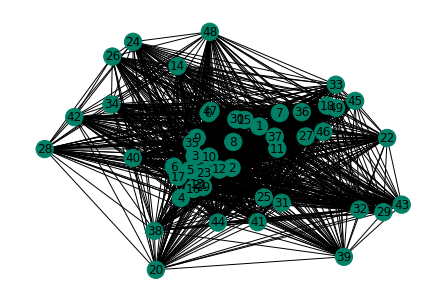

In [36]:
#### 차수 중심성
dc = nx.degree_centrality(G)
draw_cengrality(G, pos, dc)


# 카운트벡터로 중심성 구하기

In [38]:
cv = CountVectorizer(stop_words=stopwords, min_df=0.01, token_pattern=r'\w{1,}', binary=True)


In [39]:
%%time
dtm = cv.fit_transform(corpus)


CPU times: total: 16.8 s
Wall time: 16.9 s


In [40]:
cooccur = dtm.T @ dtm
adj_mtx = cooccur.A


In [50]:
adj_mtx.shape

(8346, 8346)

In [41]:
n = np.diag(adj_mtx)


In [42]:
total, _ = dtm.shape


In [43]:
lift = total * adj_mtx / np.outer(n, n)


In [44]:
m = np.where(lift >= 2, 1, 0)


In [45]:
np.fill_diagonal(m, 0)


In [46]:
import networkx as nx


In [47]:
net = nx.from_numpy_array(m)


AttributeError: 'Graph' object has no attribute 'shape'

In [14]:
words = cv.get_feature_names_out()
# net = nx.relabel_nodes(net, dict(enumerate(words)))
# net2 = nx.relabel_nodes(net)


TypeError: relabel_nodes() missing 1 required positional argument: 'mapping'

In [ ]:
print(len(words))
print(words[800:810])
# print(words[602])
# ko_words = words[602:]
# print(len(ko_words))


In [34]:
list(nx.neighbors(net, '산'))


NetworkXError: The node 산 is not in the graph.

In [16]:
%%time
# # 연결중심성(degree centrality): 연결된 단어 수 / (전체 단어 수 - 1)
# dc = nx.degree_centrality(net)

# 매개중심성(between centrality): 단어-단어 간의 최단 경로에 포함된 비율
bc = nx.betweenness_centrality(net)

# # 근접중심성(closeness centrality): 다른 단어와 거리가 평균적으로 짧은 단어
# cc = nx.closeness_centrality(net)

# # 고유벡터중심성(eigenvector centrality): 중요한 단어와 연결된 단어가 중요한 단어
# ec = nx.eigenvector_centrality(net)


KeyboardInterrupt: 

In [17]:
# 중심성을 데이터 프레임으로 변환
ecf = pd.DataFrame(bc.items(), columns=['word', 'centrality'])


NameError: name 'bc' is not defined

In [ ]:
# 중심성 순으로 정렬
ecf.sort_values('centrality')


## 시각화

In [ ]:
# pip install pyvis
from pyvis.network import Network
vis = Network(height='800px', width='1000px')
vis.from_nx(net)
vis.show_buttons(filter_=True)
vis.save_graph('nx.html')
